In [1]:
# Step 1: Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Step 2: Create synthetic dataset

np.random.seed(42)

n = 2000

retailers = ['Sports Direct', 'Adidas']
regions = ['UK', 'Europe', 'USA', 'Asia']
products = ['Shoes', 'Clothing', 'Accessories']
gender = ['Male', 'Female']
income_level = ['Low', 'Medium', 'High']
age_group = ['18-24', '25-34', '35-44', '45-54']

data = pd.DataFrame({

    'Retailer': np.random.choice(retailers, n),

    'Region': np.random.choice(regions, n),

    'Product': np.random.choice(products, n),

    'Units_Sold': np.random.randint(10, 500, n),

    'Price_per_Unit': np.random.randint(20, 200, n),

    'Customer_Gender': np.random.choice(gender, n),

    'Customer_Income': np.random.choice(income_level, n),

    'Customer_Age_Group': np.random.choice(age_group, n)
})

# Calculate Total Sales
data['Total_Sales'] = data['Units_Sold'] * data['Price_per_Unit']

# Calculate Operating Profit
profit_margin = np.random.uniform(0.05, 0.40, n)

data['Operating_Profit'] = data['Total_Sales'] * profit_margin

data['Operating_Margin'] = data['Operating_Profit'] / data['Total_Sales']

data.head()


,Retailer,Region,Product,Units_Sold,Price_per_Unit,Customer_Gender,Customer_Income,Customer_Age_Group,Total_Sales,Operating_Profit,Operating_Margin
0,Sports Direct,USA,Accessories,220,48,Male,High,45-54,10560,3318.258980,0.314229
1,Adidas,Asia,Accessories,201,54,Male,Medium,18-24,10854,1793.881103,0.165274
2,Sports Direct,Europe,Accessories,53,25,Female,Medium,45-54,1325,130.355130,0.098381
3,Sports Direct,Asia,Clothing,38,159,Female,Low,45-54,6042,1145.950844,0.189664
4,Sports Direct,Asia,Clothing,68,130,Female,Low,45-54,8840,3473.855255,0.392970


In [3]:
# Step 3: Create classification target

data['High_Profit'] = np.where(data['Operating_Margin'] > 0.20, 1, 0)

data.head()


,Retailer,Region,Product,Units_Sold,Price_per_Unit,Customer_Gender,Customer_Income,Customer_Age_Group,Total_Sales,Operating_Profit,Operating_Margin,High_Profit
0,Sports Direct,USA,Accessories,220,48,Male,High,45-54,10560,3318.258980,0.314229,1
1,Adidas,Asia,Accessories,201,54,Male,Medium,18-24,10854,1793.881103,0.165274,0
2,Sports Direct,Europe,Accessories,53,25,Female,Medium,45-54,1325,130.355130,0.098381,0
3,Sports Direct,Asia,Clothing,38,159,Female,Low,45-54,6042,1145.950844,0.189664,0
4,Sports Direct,Asia,Clothing,68,130,Female,Low,45-54,8840,3473.855255,0.392970,1


In [4]:
# Step 4: Encode categorical variables

le = LabelEncoder()

categorical_cols = [
    'Retailer',
    'Region',
    'Product',
    'Customer_Gender',
    'Customer_Income',
    'Customer_Age_Group'
]

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.head()


,Retailer,Region,Product,Units_Sold,Price_per_Unit,Customer_Gender,Customer_Income,Customer_Age_Group,Total_Sales,Operating_Profit,Operating_Margin,High_Profit
0,1,3,0,220,48,1,0,3,10560,3318.258980,0.314229,1
1,0,0,0,201,54,1,2,0,10854,1793.881103,0.165274,0
2,1,1,0,53,25,0,2,3,1325,130.355130,0.098381,0
3,1,0,1,38,159,0,1,3,6042,1145.950844,0.189664,0
4,1,0,1,68,130,0,1,3,8840,3473.855255,0.392970,1


In [5]:
# Step 5: Define X and y

X = data.drop(['Operating_Profit', 'Operating_Margin', 'High_Profit'], axis=1)

y = data['High_Profit']

X.head()


,Retailer,Region,Product,Units_Sold,Price_per_Unit,Customer_Gender,Customer_Income,Customer_Age_Group,Total_Sales
0,1,3,0,220,48,1,0,3,10560
1,0,0,0,201,54,1,2,0,10854
2,1,1,0,53,25,0,2,3,1325
3,1,0,1,38,159,0,1,3,6042
4,1,0,1,68,130,0,1,3,8840


In [6]:
# Step 6: Split dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)


In [7]:
# Step 7: Scale features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Step 8: Logistic Regression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.588

Classification Report:

              precision    recall  f1-score   support

           0       0.36      0.09      0.14       193
           1       0.61      0.90      0.73       307

    accuracy                           0.59       500
   macro avg       0.49      0.50      0.44       500
weighted avg       0.52      0.59      0.50       500



In [9]:
# Step 9: Random Forest

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.536

Classification Report:

              precision    recall  f1-score   support

           0       0.37      0.28      0.32       193
           1       0.61      0.69      0.65       307

    accuracy                           0.54       500
   macro avg       0.49      0.49      0.48       500
weighted avg       0.52      0.54      0.52       500



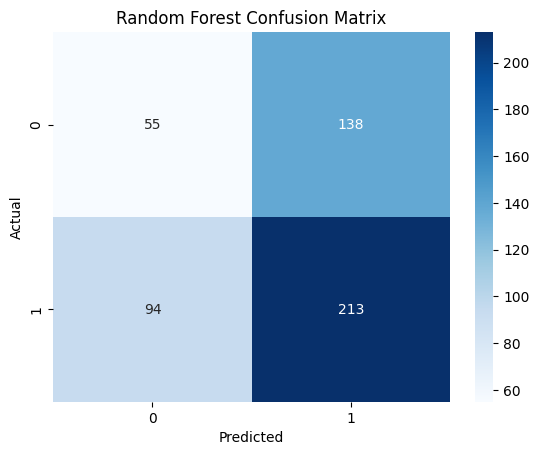

In [10]:
# Step 10: Confusion Matrix

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


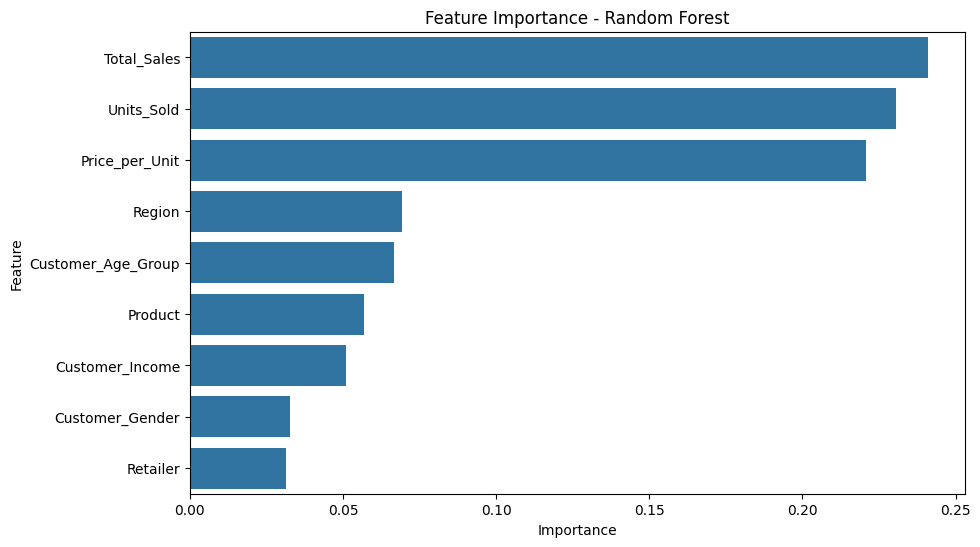

In [11]:
# Step 11: Feature Importance

importance = rf_model.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df
)

plt.title("Feature Importance - Random Forest")

plt.show()


In [12]:
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.588
Random Forest Accuracy: 0.536


In [13]:
data.to_csv("sports_direct_adidas_sales_dataset.csv", index=False)
